In [18]:
import pandas as pd

# Reading the cleaned CSV file
df_cleaned = pd.read_csv(r'C:\Users\MMM\Documents\10 Academy File\kaim-week-4\Data\cleaned_merge.csv')


C:\Users\MMM\AppData\Local\Temp\ipykernel_12172\3472050244.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(r'C:\Users\MMM\Documents\10 Academy File\kaim-week-4\Data\cleaned_merge.csv')


In [19]:
df_cleaned.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


To Check & compare sales behavior before, during, and after holidays
Identify Holiday Periods The column StateHoliday should indicate whether a date is during a public holiday. You might also want to create new columns that indicate whether a date is before or after a holiday.

Before Holiday: Create a column to identify days just before holidays (e.g., the day before a holiday).
During Holiday: Use the StateHoliday column.
After Holiday: Create a column to identify days immediately following holidays.

In [20]:
# Mark days as 'Before Holiday', 'During Holiday', 'After Holiday'
df_cleaned['BeforeHoliday'] = df_cleaned['StateHoliday'].shift(-1).fillna(0)  # Previous day is a holiday
df_cleaned['AfterHoliday'] = df_cleaned['StateHoliday'].shift(1).fillna(0)  # Next day is a holiday

Group by Holiday Periods You can now group your data by these periods (BeforeHoliday, DuringHoliday, AfterHoliday) and calculate the average sales for each period.

In [21]:
# Create a new column to define the period
df_cleaned['HolidayPeriod'] = 'NormalDay'
df_cleaned.loc[df_cleaned['StateHoliday'] != '0', 'HolidayPeriod'] = 'DuringHoliday'
df_cleaned.loc[df_cleaned['BeforeHoliday'] != '0', 'HolidayPeriod'] = 'BeforeHoliday'
df_cleaned.loc[df_cleaned['AfterHoliday'] != '0', 'HolidayPeriod'] = 'AfterHoliday'

In [22]:
sales_by_period = df_cleaned.groupby('HolidayPeriod')['Sales'].mean()
print(sales_by_period)

HolidayPeriod
AfterHoliday     5399.312497
BeforeHoliday    4125.641516
DuringHoliday     198.385777
NormalDay        5674.921770
Name: Sales, dtype: float64


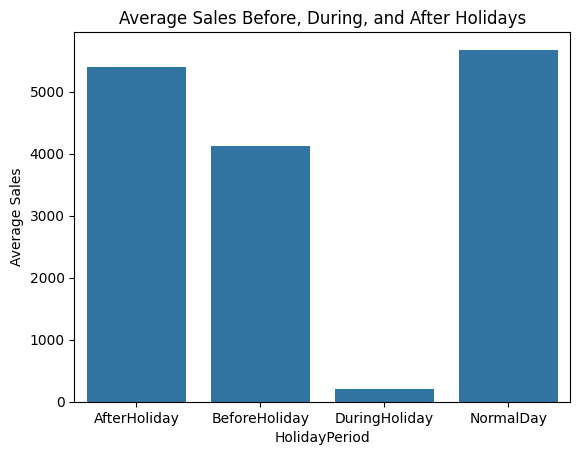

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=sales_by_period.index, y=sales_by_period.values)
plt.title('Average Sales Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()


Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

In [24]:
import pandas as pd

# List of Christmas dates (you can add more holidays to this list)
holiday_dates = ['2013-12-25', '2014-12-25', '2015-12-25']  # Add dates for your dataset years
holiday_names = ['Christmas'] * len(holiday_dates)

# Convert to DataFrame
holidays_df = pd.DataFrame({'Date': holiday_dates, 'Holiday': holiday_names})
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

# Merge holidays into your main DataFrame
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df = df_cleaned.merge(holidays_df, how='left', on='Date')

# Fill NaN values with 'No Holiday' for days that are not holidays
df['Holiday'].fillna('No Holiday', inplace=True)

# If you want to flag a range around holidays (e.g., 7 days before/after)
df['HolidayPeriod'] = df['Date'].apply(
    lambda x: 'Christmas' if pd.to_datetime('2015-12-18') <= x <= pd.to_datetime('2015-12-31') else 'No Holiday'
)

C:\Users\MMM\AppData\Local\Temp\ipykernel_12172\1914188022.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Holiday'].fillna('No Holiday', inplace=True)


In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,BeforeHoliday,AfterHoliday,HolidayPeriod,Holiday
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,0,0,No Holiday,No Holiday
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,0,No Holiday,No Holiday
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,0,No Holiday,No Holiday
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,0,0,No Holiday,No Holiday
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,0,0,No Holiday,No Holiday


Group by Holiday or Non-Holiday Periods

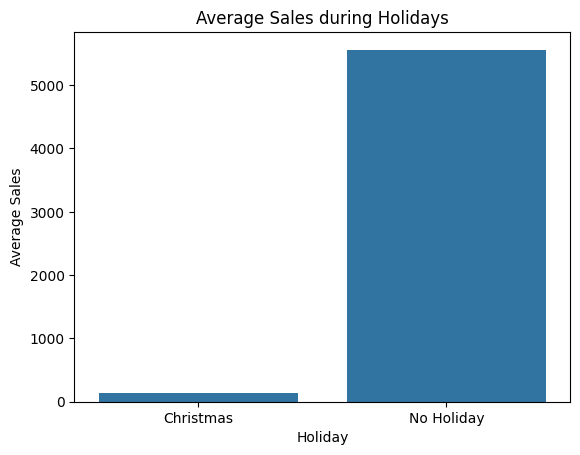

In [28]:
# Group by Holiday Period and calculate average sales
holiday_sales = df.groupby('Holiday')['Sales'].mean().reset_index()

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Holiday', y='Sales', data=holiday_sales)
plt.title('Average Sales during Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Sales')
plt.show()

Analyze Sales Trends Before, During, and After Holidays

**Create periods for analysis: Before, During, After Holidays**

df['HolidayPeriod'] = df.apply( lambda row: 'BeforeHoliday' if (row['Date'] < pd.to_datetime('2015-12-25') and row['Date'] >= pd.to_datetime('2015-12-18')) else ('DuringHoliday' if row['Date'] == pd.to_datetime('2015-12-25') else ('AfterHoliday' if (row['Date'] > pd.to_datetime('2015-12-25') and row['Date'] <= pd.to_datetime('2015-12-31')) else 'NormalDay')), axis=1 )

**Group by Holiday Period**

holiday_period_sales = df.groupby('HolidayPeriod')['Sales'].mean().reset_index()

**Plot the results**

sns.barplot(x='HolidayPeriod', y='Sales', data=holiday_period_sales) plt.title('Average Sales Before, During, and After Holidays') plt.xlabel('Holiday Period') plt.ylabel('Average Sales') plt.show()

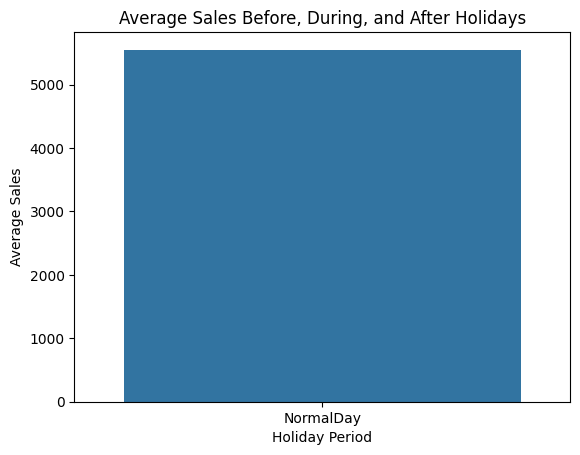

In [29]:
# Create periods for analysis: Before, During, After Holidays
df['HolidayPeriod'] = df.apply(
    lambda row: 'BeforeHoliday' if (row['Date'] < pd.to_datetime('2015-12-25') and row['Date'] >= pd.to_datetime('2015-12-18')) 
    else ('DuringHoliday' if row['Date'] == pd.to_datetime('2015-12-25') 
    else ('AfterHoliday' if (row['Date'] > pd.to_datetime('2015-12-25') and row['Date'] <= pd.to_datetime('2015-12-31')) 
    else 'NormalDay')), axis=1
)

# Group by Holiday Period
holiday_period_sales = df.groupby('HolidayPeriod')['Sales'].mean().reset_index()

# Plot the results
sns.barplot(x='HolidayPeriod', y='Sales', data=holiday_period_sales)
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()


In [4]:
import logging
import os

file_path = r'C:\Users\MMM\Documents\10 Academy File\kaim-week-4\Data\train.csv'
# Set up logging
log_dir = "logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

logging.basicConfig(
    filename=os.path.join(log_dir, "data_analysis.log"),  # Log file path
    level=logging.INFO,  # Set log level
    format="%(asctime)s - %(name)s - %(levelname)s - %(message)s",
)

logger = logging.getLogger(__name__)

# Example usage
def load_data(file_path):
    try:
        logger.info(f"Loading data from {file_path}")
        # Your data loading code here, e.g. pd.read_csv(file_path)
        # data = pd.read_csv(file_path)
        logger.info(f"Successfully loaded data from {file_path}")
        # return data
    except Exception as e:
        logger.error(f"Error loading data from {file_path}: {e}")

def analyze_data(data):
    try:
        logger.info("Starting data analysis...")
        # Your data analysis code here
        logger.info("Data analysis completed successfully.")
    except Exception as e:
        logger.error(f"Data analysis failed: {e}")

# Example usage of logging
load_data('Data/train.csv')
# analyze_data(data)
